In [1]:
""" 
Coursework for k-means, spectral agglomerative clustering algorithms,
as well as ensemble clustering.
""" 

from matplotlib import pyplot as plt
from sklearn import cluster,datasets
from sklearn.cluster import KMeans
import numpy as np
import warnings

## Part 1. K-means Clustering Analysis

### <span style="color:red">=========== Assignment 1 ===========</span>

Use mu_a as the initial mean point: 
(150, 2)


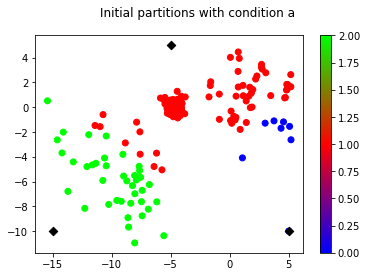

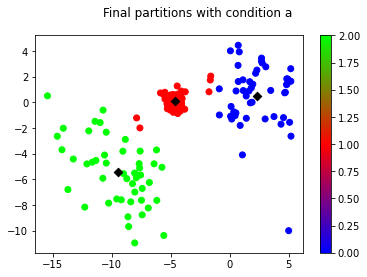

Use mu_b as the initial mean point: 


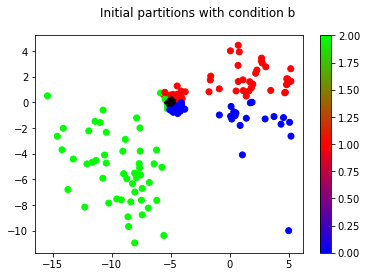

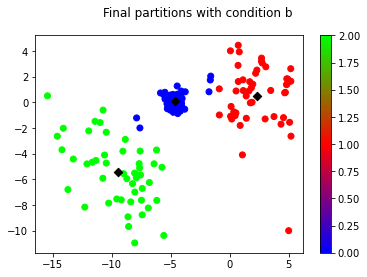

Use mu_c as the initial mean point: 


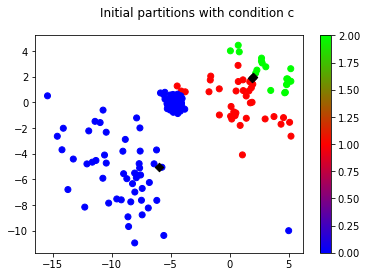

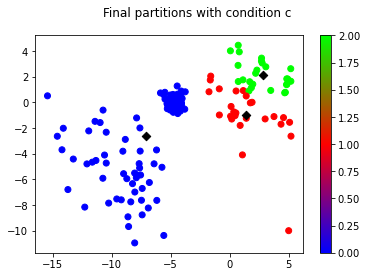

In [4]:
########################### K-means Clustering Analysis #######################################
# Assignment 1:
# ===
from sklearn.metrics.pairwise import euclidean_distances

X = np.load('./Data/kmeans_data_1.npy')

mu_a = np.array([[5,-10],[-5,5],[-15,-10]]) # The given initial mean points of (a) 
mu_b = np.array([[-5,0],[-5,0.2],[-5.2,0]]) # The given initial mean points of (b) 
mu_c = np.array([[-6,-5],[1.9,1.9],[2.,2.]]) # The given initial mean points of (c) 


def partition(X, mu):
    """
    Helper function that performs a partition given the mean points using Euclidean distance
    Each input is numpy array:
        - X: (N,d) or (N,C,d), data points
        - mu: (C x d), the mean points
    
    Returns:
        partition: (N), the label of partition that each datapoint belongs to
    """
    N = X.shape[0] # number of objects
    C = mu.shape[0] # number of clusters
   
    #tile x (N,d) to (N,C,D)
    if len(np.shape(X)) == 2:
        x_CND = np.tile(X,[C,1,1])#(N,d) -> (C,N,d)
        x_NCD = np.transpose(x_CND, axes = [1,0,2])
    distance_NC = np.sum((x_NCD - mu)**2,axis = 2)
    argmin_distance_N = np.argmin(distance_NC,axis = 1)
    distance_N = np.sqrt(np.min(distance_NC,axis = 1))
    partition = argmin_distance_N
    
    return partition

############################
# a) Implement a display function, where different clusters must be marked in different colours

def visualize_kmeans_res(mu,X,lb,title = ''):
    #####
    #   Your code here
    # ===
    
    #plt.figure(figsize=(7,7))
    plt.scatter(X[:,0],X[:,1],c=lb,cmap='brg')
    plt.colorbar()
    plt.scatter(mu[:,0],mu[:,1], marker='D', color='black')
    
    plt.suptitle(title)
    plt.show()
    
    
    
    ###
    #   End of your code
    ###

    
#############################
# b) Display the final partitions where the initial and final mean points
#
#   Your code here
# ===
    return
# Use mu_a as the initial mean point 

print("Use mu_a as the initial mean point: ")
lb_a = partition(X,mu_a)
lb_b = partition(X,mu_b)
lb_c = partition(X,mu_c)
print(X.shape)
D = euclidean_distances(X,X)
#print(D[1])
#print(lb_a.shape)

visualize_kmeans_res(mu_a,X,lb_a,title = 'Initial partitions with condition a')
km = KMeans(n_clusters=3, init=mu_a,n_init=1)
km.fit(X)
lb_km_a = km.labels_
cluster_centers_a = km.cluster_centers_

visualize_kmeans_res(cluster_centers_a,X,lb_km_a,title = 'Final partitions with condition a')



# Use mu_b as the initial mean point 

print("Use mu_b as the initial mean point: ")

visualize_kmeans_res(mu_b,X,lb_b,title = 'Initial partitions with condition b')
km = KMeans(n_clusters=3, init=mu_b,n_init=1)
km.fit(X)
lb_km_b = km.labels_
cluster_centers_b = km.cluster_centers_
visualize_kmeans_res(cluster_centers_b,X,lb_km_b,title = 'Final partitions with condition b')



# Use mu_c as the initial mean point 
print("Use mu_c as the initial mean point: ")

visualize_kmeans_res(mu_c,X,lb_c,title = 'Initial partitions with condition c')
km = KMeans(n_clusters=3, init=mu_c,n_init=1)
km.fit(X)
lb_km_c = km.labels_
cluster_centers_c = km.cluster_centers_
visualize_kmeans_res(cluster_centers_c,X,lb_km_c,title = 'Final partitions with condition c')






### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

Minimun f-ratio for 2 clusters =  1.538587553752485
Minimun f-ratio for 3 clusters =  0.8460023667081836
Minimum f-ratio for 4 clusters 0.6200262555998654
Minimum f-ratio for 5 clusters 0.3025783126174627
Minimum f-ratio for 6 clusters 0.3247829116616294
Minimum f-ratio for 7 clusters 0.3527813763220723
Minimum f-ratio for 8 clusters 0.3696234734434015
Minimum f-ratio for 9 clusters 0.3601475408993255
Minimum f-ratio for 10 clusters 0.38077755114443135


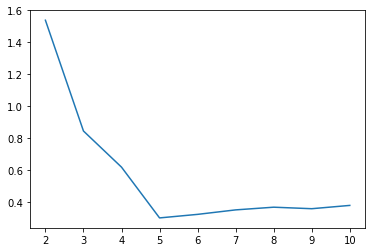

Optimal number of clusters = 5


In [3]:
##########################
# Assignment 2 
#
# K-means algorithm cannot be used until the hyperparameter K (the
# number of clusters) is set up so the
# clustering result is better. We use f_ratio from the lecture
# to do so.
# ===


################
# (a) Implement the scatter-based F-ratio index in Python 
#   where Euclidean distance is used
from numpy.linalg import norm

def f_ratio_euclidean(X,lb):
    """
    # Compute the f-ratio = k * ssw / ssb
    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - lb: (n,) label of each datapoint, each element is an
              integer, >=0, <n.
    
    Return:
        - f_ratio = k * ssw / ssb: scalar
    """ 
    k = len(np.unique(lb))
    _,d = np.shape(X)
    n = np.zeros(k)
    c = np.zeros([k,d])
    SSW=np.zeros(k)
    SSB=np.zeros(k)
    ###
    # Your code here
    ###
    
    mean = np.mean(X)
    for i in range(0,k):
        sum_pts = 0
        points_cluster = np.where(lb==i)
        pc = points_cluster[0]
        cluster = X[pc]
        cardinality = len(cluster)
        mean_cluster= np.sum(cluster,axis=0)/cardinality
        
        for j in range(0,cardinality):
            sum_pts = sum_pts + (norm(cluster[j] - mean_cluster))**2
        SSW[i] = sum_pts
        SSB[i] = cardinality * ((norm(mean_cluster - mean))**2)
        
    
    SSW_ = np.sum(SSW)
    SSB_ = np.sum(SSB)
    
    F_ratio = (k * SSW_)/SSB_

    
    ###
    # End of your code
    ###
    return F_ratio


warnings.filterwarnings('ignore')
np.random.seed(0)
################
# (b) For K = 2, 3, · · · , 10, run the the K-means each with 3 different random initialisation
#  on the 'kmeans_data_2.npy' dataset and plot F-ratio index versus K
#
# Your code here:
# ===
f_ratio_ = np.zeros(9)
mu_3=[[0]*2]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[4,-1],[3,-5]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[1,0],[6,0]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,1],[-8,6]]) # The given initial mean points of (c) 

clust = 0

for i in range(0,3):
    km = KMeans(n_clusters=2, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print(f_ratio[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust] = min(f_ratio)
print("Minimun f-ratio for 2 clusters = ", f_ratio_[clust])

mu_3=[[0]*3]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[5,-10],[-5,5],[-15,-10]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[-5,0],[-5,0.2],[-5.2,0]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,-3],[8,1.9],[2.,2.]]) # The given initial mean points of (c) 

clust = 1

for i in range(0,3):
    km = KMeans(n_clusters=3, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print(f_ratio[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust] = min(f_ratio)
print("Minimun f-ratio for 3 clusters = ", f_ratio_[clust])


mu_3=[[0]*4]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[5,-10],[-5,5],[-15,-10],[-3,6]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[-5,0],[-5,0.2],[-5.2,0],[-5,8]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,-3],[8,1.9],[2.,2.],[3,4]]) # The given initial mean points of (c) 

clust = 2

for i in range(0,3):
    km = KMeans(n_clusters=4, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust] = min(f_ratio)
print("Minimum f-ratio for 4 clusters",f_ratio_[clust])


mu_3=[[0]*5]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[5,-10],[-5,5],[-15,-10],[-3,6],[-2,4]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[-5,0],[-5,0.2],[-5.2,0],[-5,8],[-1,-1]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,-3],[8,1.9],[2.,2.],[3,4],[-4,8]]) # The given initial mean points of (c) 

clust=3

for i in range(0,3):
    km = KMeans(n_clusters=5, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust] = min(f_ratio)
print("Minimum f-ratio for 5 clusters",f_ratio_[clust])


mu_3=[[0]*6]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[5,-10],[-5,5],[-15,-10],[-3,6],[-2,4],[3,8]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[-5,0],[-5,0.2],[-5.2,0],[-5,8],[-1,-1],[-6,6]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,-3],[8,1.9],[2.,2.],[3,4],[-4,8],[9,2]]) # The given initial mean points of (c) 

clust = 4

for i in range(0,3):
    km = KMeans(n_clusters=6, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust ]= min(f_ratio)
print("Minimum f-ratio for 6 clusters",f_ratio_[clust])


mu_3=[[0]*7]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[5,-10],[-5,5],[-15,-10],[-3,6],[-2,4],[3,8],[7,-6]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[-5,0],[-5,0.2],[-5.2,0],[-5,8],[-1,-1],[-6,6],[0,5]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,-3],[8,1.9],[2.,2.],[3,4],[-4,8],[9,2],[-2,2]]) # The given initial mean points of (c) 

clust = 5

for i in range(0,3):
    km = KMeans(n_clusters=7, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust] = min(f_ratio)
print("Minimum f-ratio for 7 clusters",f_ratio_[clust])


mu_3=[[0]*8]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[5,-10],[-5,5],[-15,-10],[-3,6],[-2,4],[3,8],[7,-6],[3,-3]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[-5,0],[-5,0.2],[-5.2,0],[-5,8],[-1,-1],[-6,6],[0,5],[6,8]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,-3],[8,1.9],[2.,2.],[3,4],[-4,8],[9,2],[-2,2],[-3,4]]) # The given initial mean points of (c) 

clust = 6

for i in range(0,3):
    km = KMeans(n_clusters=8, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust] = min(f_ratio)
print("Minimum f-ratio for 8 clusters",f_ratio_[clust])


mu_3=[[0]*9]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[5,-10],[-5,5],[-15,-10],[-3,6],[-2,4],[3,8],[4,3],[-2,5],[4,-2]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[-5,0],[-5,0.2],[-5.2,0],[-5,8],[-1,-1],[-6,6],[0,5],[4,-6],[3,-1]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,-3],[8,1.9],[2.,2.],[3,4],[-4,8],[9,2],[-2,-5],[7,-4],[3,6]]) # The given initial mean points of (c) 

clust = 7

for i in range(0,3):
    km = KMeans(n_clusters=9, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust] = min(f_ratio)
print("Minimum f-ratio for 9 clusters",f_ratio_[clust])


mu_3=[[0]*10]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')
mu_3[0] = np.array([[5,-10],[-5,5],[-15,-10],[-3,6],[-2,4],[3,8],[4,3],[-2,5],[4,-2],[9,-3]]) # The given initial mean points of (a) 
mu_3[1] = np.array([[-5,0],[-5,0.2],[-5.2,0],[-5,8],[-1,-1],[-6,6],[0,5],[4,-6],[3,-1],[3,5]]) # The given initial mean points of (b) 
mu_3[2] = np.array([[-6,-3],[8,1.9],[2.,2.],[3,4],[-4,8],[9,2],[-2,-5],[7,-4],[3,6],[-1,1]]) # The given initial mean points of (c) 


clust = 8

for i in range(0,3):
    km = KMeans(n_clusters=10, init=mu_3[i],n_init=1)
    km.fit(X)
    lb_km[i] = km.labels_
    f_ratio[i] = f_ratio_euclidean(X,lb_km[i])
    #print("hereee",f_ratio[i])
    
f_ratio_[clust] = min(f_ratio)
print("Minimum f-ratio for 10 clusters",f_ratio_[clust])

k=np.array([2,3,4,5,6,7,8,9,10])

plt.plot(k,f_ratio_)
plt.show()

print('Optimal number of clusters = 5')

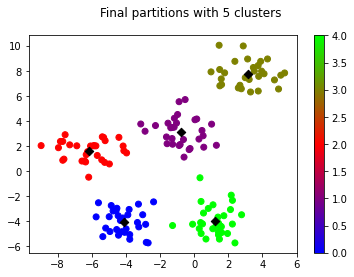

In [4]:
warnings.filterwarnings('default')
################
# (c) Display the final partition with optimal number of clusters
#
# Your code here:
# ===

mu_3=[[0]*5]*3
lb_km = [[0]*150]*3
f_ratio = np.zeros(3)
X = np.load('./Data/kmeans_data_2.npy')

mu_5 = np.array([[-5,0],[-5,0.2],[-5.2,0],[-5,8],[-1,-1]]) # The given initial mean points of (b) 


km = KMeans(n_clusters=5, init=mu_5,n_init=1)
km.fit(X)
lb_km = km.labels_
cluster_centers_c = km.cluster_centers_
#visualize_kmeans_res(mu_5,X,lb_km,title = 'Final partitions with 5 clusters')
visualize_kmeans_res(cluster_centers_c,X,lb_km,title = 'Final partitions with 5 clusters')


### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Spectral Clustering Analysis

### <span style="color:red">=========== Assignment 3 ===========</span>

C:\Users\shefa\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'datapoint and clustering result')

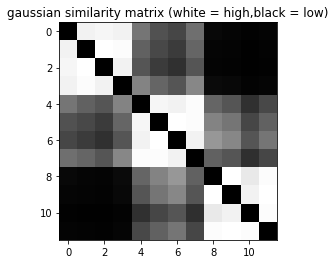

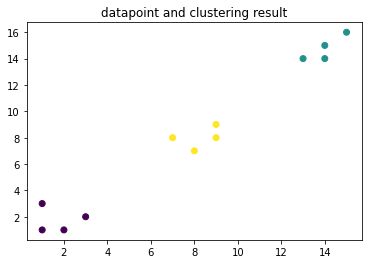

In [18]:
########################### Spectral Clustering Analysis ######################################
# Assignment 3:
#
# Here you are to implement the asymmetric normalised spectral clustering algorithm.
#
# Hint: To implement the asymmetric_SC function, you can
#       use the built-in function, np.linalg.eig, in the numpy library for eigen analysis,
#       and, pairwise_distances, in sklearn.metrics for compute parewise distance, and the
#       sklearn built-in function, cluster.KMeans.
# ===

from sklearn.metrics import pairwise_distances

def gaussian_similarity(X,delta):
    """
    # Compute the similarity matrix for spectral clustering using RBF kernel
    # Construction of similarity matrix is diverse and non-trivial, this
    # is only one of the types.
    # Also, the parameter delta has large influence on the final result
    
    
    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    row,col=X.shape
    GassMatrix=np.zeros(shape=(row,row))
    #X=np.asarray(X)
    '''i=0
    for v_i in X:
        j=0
        for v_j in X:
            x = v_i.T
            z = v_j.T
            GassMatrix[i,j] = np.exp((-(np.linalg.norm(x-z)**2))/(2*delta**2))
            
            j+=1
        i+=1
    '''
    GassMatrix = np.exp((-(pairwise_distances(X,X)**2))/(2*delta**2))
    #print(GassMatrix)
    for i in range(0,len(GassMatrix)):
        for j in range(0,len(GassMatrix)):
            if i==j:
                GassMatrix[i][j] = 0
    #print(GassMatrix)
    ###
    # Hint: The RBF kernel definition can be found in the lecture notes.
    return GassMatrix

def asymmetric_SC(W,k = 1):
    """
    # Compute the spectral clustering according to [Shi and Malik 2000]
    # See http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    Input:
        - W: (n,n), similarity matrix or weighted adjacency matrix
        - k: scalar, number of clusters
            
    
    Return:
        - lb: (n,) label for each datapoint
        - e: 1-d array of eigen value
        - v: 2-d matrix, each column is an eigen vector
    """
    ###
    # Hint: Be wary that "Asymmetric Normalized" spectral clustering does eigen analysis on D^-1 * L .
    #       See lecture slides if you don't know how to start 
    #
    # Hint: Computing the invert matrix is computationally expensive for high-dimensional
    #       matrices. But here, we only need to the invert a diagnal matrix, which is simple to compute.
    # PS: There is no unreal eigen value here, but sometimes numerical precision problems happen
    #
    # First do eigen analysis. 
    #
    # Your code here :
    ###
    lb=0
    e=0
    v=0
    d_ = np.zeros(len(W))
    for i in range(0,len(W)):
        d_[i] = sum(W[i])
    
    D = np.diag(d_)
    #print(D)
    #print(W)
    L = D - W
    #print("here",np.sum(L[1]))
    L = np.matmul(np.linalg.inv(D),L)
    
    eigVal,eigVec = np.linalg.eig(L) 
    eigVal = eigVal.real
    #print("here eigvals",eigVal)
    sorted_eigen_indexes = np.argsort(eigVal)
    #print(sorted_eigen_indexes)
    #print(eigVec.shape)
    eigVec_sorted = eigVec[:,sorted_eigen_indexes]
    eigVec_sorted = eigVec_sorted[:,1:k]
    eigVec_sorted = eigVec_sorted.real
    #print(eigVec_sorted.shape)
    km = KMeans(n_clusters=k,init='random').fit(eigVec_sorted)
    lb = km.labels_
    #print(lb)
    ###
    # End of your code
    ###
    return lb,eigVal,eigVec


####### 
# Now test your implementation with toy data and provided hyper parameters.
# You should see a graph showing a clear block matrix, and a reasonable clustering result
# PS: this is just for testing. No suggestion of using what parameter
# ==
X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])


W = gaussian_similarity(X,delta = pairwise_distances(X).std())
#print(W)

#print(D.shape)

plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')

lb,_,_ = asymmetric_SC(W,3)

plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
#print(pairwise_distances(X))


### <span style="color:red">=========== End of Assignment 3 ===========</span>

### <span style="color:red">=========== Assignment 4 ===========</span>

In [24]:
########################### 
# Assignment 4:
#
# Here you are to apply your implemented gaussian_similarity function to a dataset,
# saved in './Data/SC_data_1.npy'. You need to do:
#   a) find out an appropriate hyperparameter value in the Gaussian kernel
#   b) calculate and report the first non-zero eigen vector of laplacian L
#   c) decide how many clusters are in this data set and display results (you will work on this in the next cell)
#
# PS: in b), please do eigen analysis of 'L', not D^-1 L.
# ===
X = np.load('./Data/SC_data_1.npy')
###
# a) & b), You code here:
###

#This loop has been commented out to save running time
'''
for i in range(0,20):
    
    W = gaussian_similarity(X,delta = i)
#print(W)

#print(D.shape)
    
    plt.figure()
    #plt.title('gaussian similarity matrix (white = high,black = low)')
    plt.title(i)
    plt.imshow(W,cmap = 'gray')

'''

print('The optimal value of hyperparameter delta is calculated based upon the similarity matrix. The point after which the whitening stops, is chosen as the delta')
sigma = 6
W = gaussian_similarity(X,delta = sigma)

lb,eig,eigvec = asymmetric_SC(W,2)

sorted_eigen_indexes = np.argsort(eig)

eigvec = eigvec[sorted_eigen_indexes]
#print("Elements of eigenvector corresponding to 2nd smallest eigenvalue:-")
#print(eigvec[1])

#print(pairwise_distances(X))


###
# End of your code
#
# Fill your result below:
###
print('a) One hyperparameter value for Gaussian kernel:',sigma)
print('b) First non-zero eigen vector:', eigvec[1])
#print(eigvec.shape)

The optimal value of hyperparameter delta is calculated based upon the similarity matrix. The point after which the whitening stops, is chosen as the delta
a) One hyperparameter value for Gaussian kernel: 6
b) First non-zero eigen vector: [-1.58113883e-01 -5.19386919e-02  1.16867744e-01  1.47677880e-01
 -3.56762654e-02 -6.19288127e-03 -1.60140593e-02 -1.09173692e-02
  2.12004778e-03 -1.12930094e-02  1.26023162e-02 -3.22006285e-02
  5.50434535e-02  3.73962179e-01  1.44858831e-03 -9.12212113e-03
  2.42664885e-03 -8.49705255e-02  8.40968823e-01 -1.25504264e-01
 -8.03339522e-02  2.83596275e-02 -6.66985793e-02  3.11359442e-03
 -1.42801573e-02 -2.53162400e-03 -4.77428300e-02 -2.51590288e-02
 -7.46763432e-02  2.22404075e-04 -1.64715760e-03  4.77566630e-02
  5.29063251e-02 -1.29512620e-02 -1.05135167e-02  3.52638468e-02
  4.14031693e-04  1.47076211e-02  2.92301036e-02  3.60211392e-02]


optimal K= [2]
c)  2  clusters, because eigengap is the maximum between 2nd and 3rd eigenvalues 


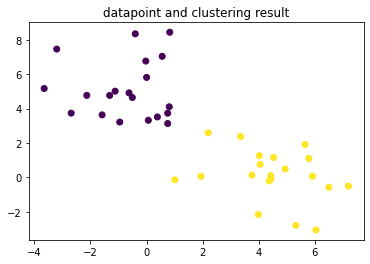

In [23]:
# c) Decide the number of clusters in this data set and display results 
# Your code here:
###
K = np.zeros(39)
for i in range(1,len(eig)-1):
    K[i] = eig[i+1] - eig[i]
#print(K)
K_star = np.max(K)
K_clust = (np.where(K == K_star)[0])
print("optimal K=",K_clust+1)
#print(np.where(K == K_star)[0])

plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')


###
#  End of your code
#
#  Fill your answer below:
###
print('c) ', 2, ' clusters, because eigengap is the maximum between 2nd and 3rd eigenvalues ' )

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

C:\Users\shefa\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


For X1
optimal delta = 4
optimal K = 2(as achived from previous question)
For X2
optimal delta = 1.5
optimal K= [10]


<ipython-input-25-f4bc626635db>:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


For X3
optimal delta = 3
optimal K= [77]


Text(0.5, 1.0, 'datapoint and clustering result')

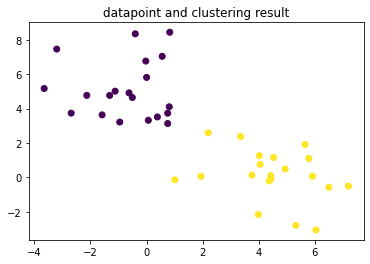

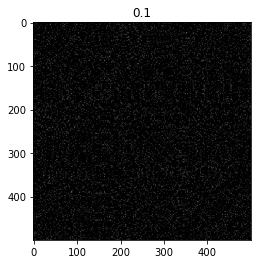

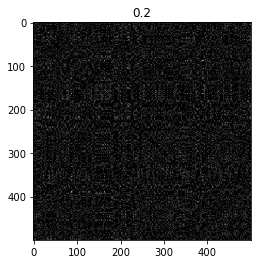

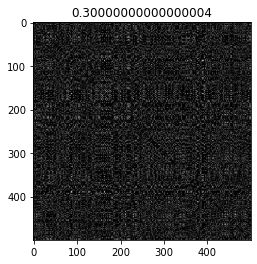

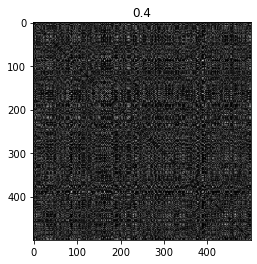

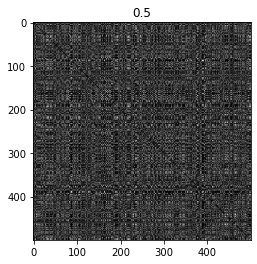

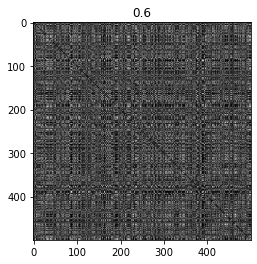

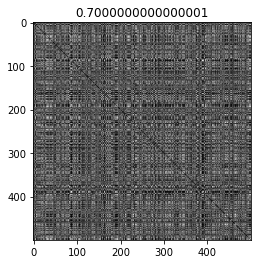

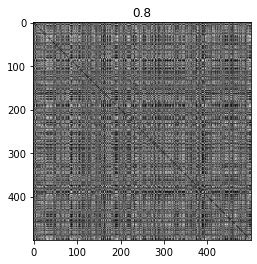

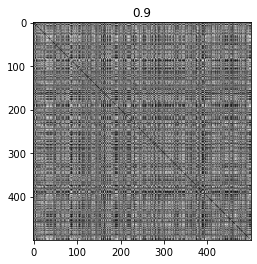

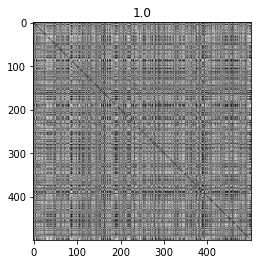

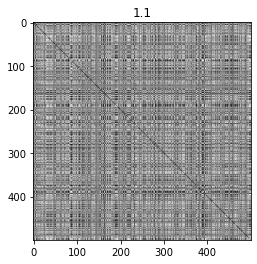

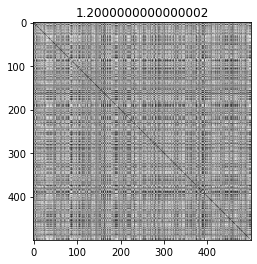

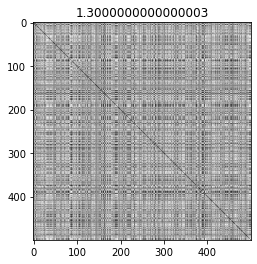

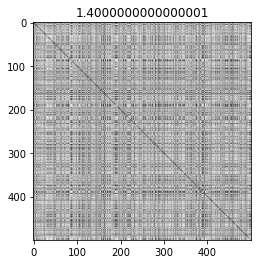

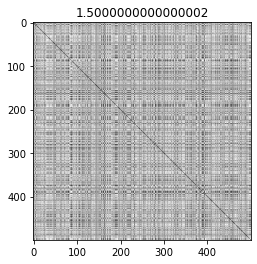

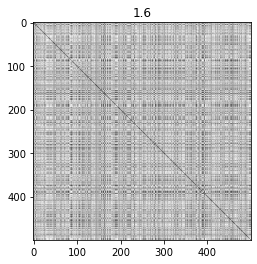

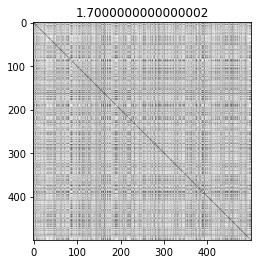

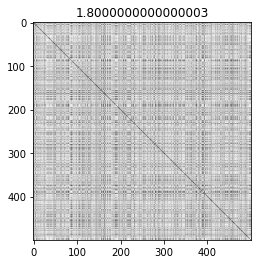

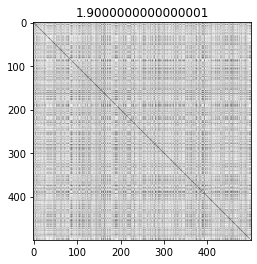

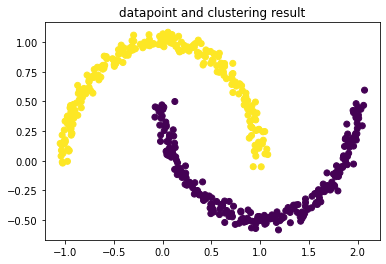

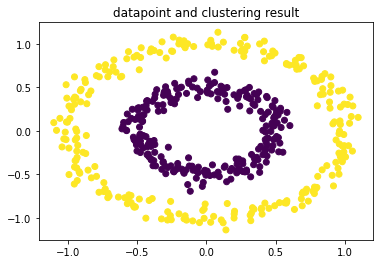

In [25]:
########################### 
# Assignment 5:
#
# Here you are to apply your implemented gaussian_similarity function to 
# more datasets and display results. You need to find proper hyper parameters
# ===
X1 = np.load('./Data/SC_data_1.npy')


X2 = np.load('./Data/SC_data_2.npy')
X3 = np.load('./Data/SC_data_3.npy')
###
#  Your code here
###
print("For X1")
W = gaussian_similarity(X1,delta = sigma)
lb,eig,eigvec = asymmetric_SC(W,2)
print("optimal delta = 4")
print("optimal K = 2(as achived from previous question)")
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c = lb)
plt.title('datapoint and clustering result')

#The optimization for hyperparameter delta is commented out here to avoid unnecessary outputs, but the result is already chosen
#from the optimization


'''
for i in np.arange(0.1,2,0.1):
    
    W = gaussian_similarity(X2,delta = i)
#print(W)

#print(D.shape)
    
    plt.figure()
    #plt.title('gaussian similarity matrix (white = high,black = low)')
    plt.title(i)
    plt.imshow(W,cmap = 'gray')
'''
print("For X2")
W = gaussian_similarity(X2,delta = 0.)
lb,eig,eigvec = asymmetric_SC(W,2)

K = np.zeros(499)
for i in range(1,len(eig)-1):
    K[i] = eig[i+1] - eig[i]
#print(K)
K_star = np.max(K)
K_clust = (np.where(K == K_star)[0])
print("optimal delta = 1.5")
print("optimal K=",K_clust+1)
lb,eig,eigvec = asymmetric_SC(W,2)

plt.figure()
plt.scatter(X2[:,0],X2[:,1],c = lb)
plt.title('datapoint and clustering result')

#The optimization for hyperparameter delta is commented out here to avoid unnecessary outputs, but the result is already chosen
#from the optimization


'''
for i in np.arange(0.1,1,0.1):
    
    W = gaussian_similarity(X3,delta = i)
#print(W)

#print(D.shape)
    
    plt.figure()
    #plt.title('gaussian similarity matrix (white = high,black = low)')
    plt.title(i)
    plt.imshow(W,cmap = 'gray')

'''
print("For X3")
W = gaussian_similarity(X3,delta =  0.1)
lb,eig,eigvec = asymmetric_SC(W,2)

K = np.zeros(499)
for i in range(1,len(eig)-1):
    K[i] = eig[i+1] - eig[i]

K_star = np.max(K)
K_clust = (np.where(K == K_star)[0])
print("optimal delta = 3")
print("optimal K=",K_clust+1)

lb,eig,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X3[:,0],X3[:,1],c = lb)
plt.title('datapoint and clustering result')









### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 3. Hierarchical Clustering Analysis

### <span style="color:red">=========== Assignment 6 ===========</span>

C:\Users\shefa\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Max z for single 2.0759052931038315
K for single = 22
Max z for complete 7.80320516202468
K for complete = 3
Max z for group 3.7445208818191826
K for group = 2


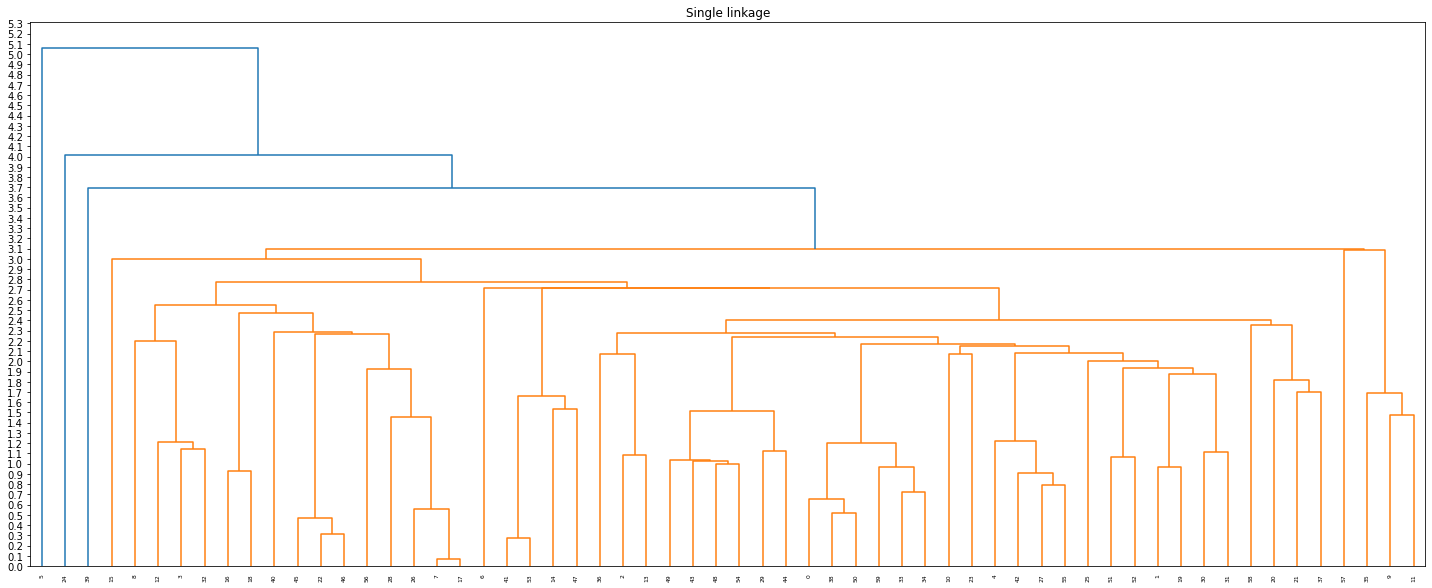

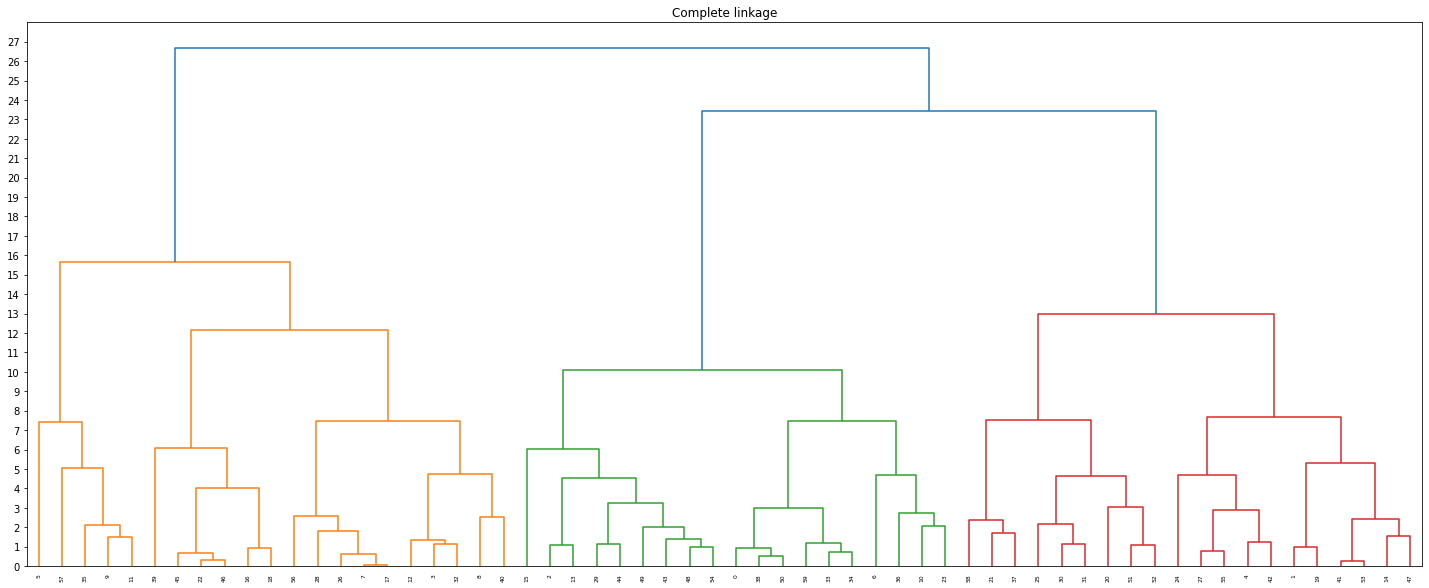

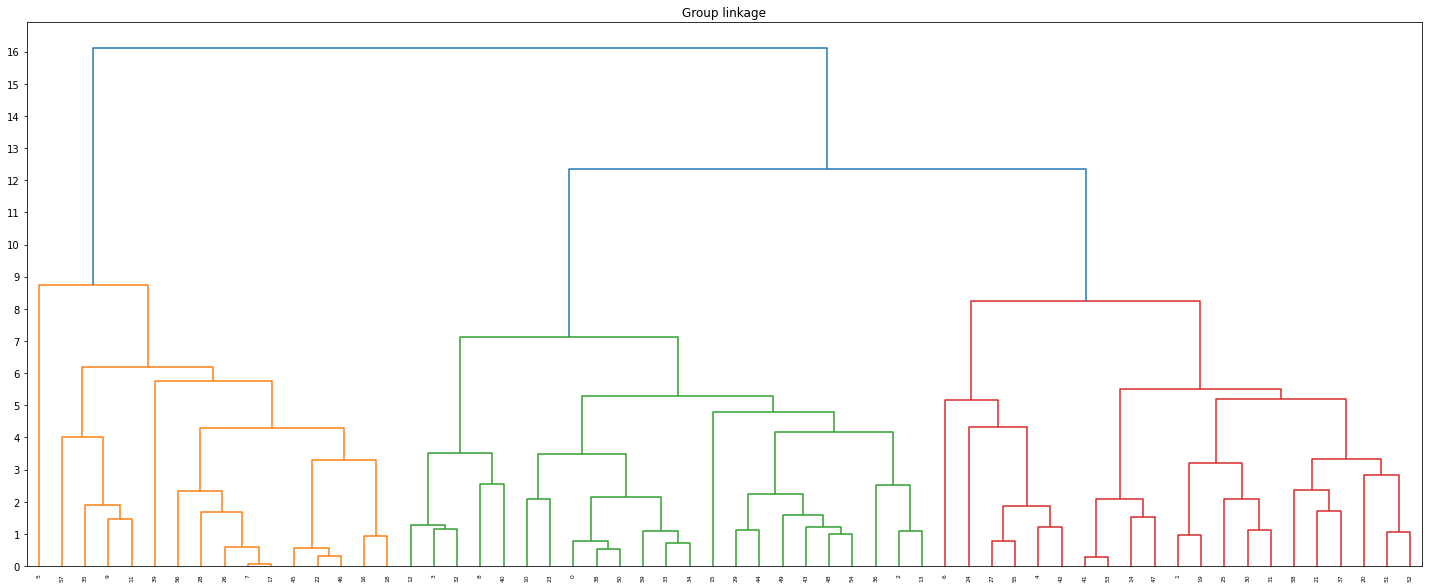

b) K = 24 for single, K = 3 for complete, K = 3 for group distance meausure


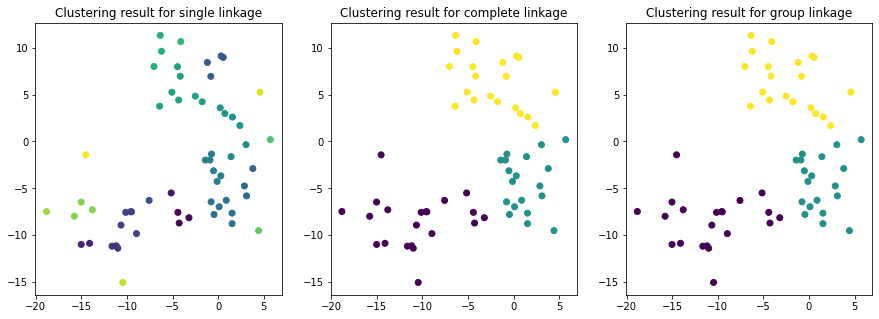

In [9]:
########################### 
# Assignment 6:
#
# Here, you are to use built-in functions in scipy.cluster.hierarchy: 'linkage, dendrogram' to 
# do hierachical clustering.
#
# You need to: a) plot three dendrogram trees achieved by the use of
# three cluster-distance measures in the agglomerative algorithm; (b) report the number of clusters
# found by using the longest K-cluster lifetime criterion achieved from (a), respectively; 
# (c) display 3 clustering results achieved by (a) and (b)
# ===
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram


# a):
# A (?,4) shape matrix Z should returned. At the i-th iteration, 
#   clusters with indices Z[i, 0] and Z[i, 1] are combined 
#   to form cluster . A cluster with an index less than n
#   corresponds to one of the n original observations. 
#   The distance between clusters Z[i, 0] and Z[i, 1] is 
#   given by Z[i, 2]. The fourth value Z[i, 3] represents 
#   the number of original observations in the newly formed cluster.
#
#   Then, plot the clustering result as a Dendrogram
#       The dendrogram illustrates how each cluster is composed by drawing a U-shaped
#       (or n-shaped) link between a non-singleton cluster and its children. The top of the 
#       U-link indicates a cluster merge. The two legs of the U-link indicate 
#       which clusters were merged. The horizental coordinates of a merge 
#       represents the distance between the two clusters. 
#
#  Your code here
###


X = np.load('./Data/HC_data.npy')
#X = np.array([[3,1.7],[1,1],[ 2,3],[2,2.5],[1.2,1],[1.1,1.5],[3,1]])
#print(X.shape)
Z_single = linkage(X,method='single',metric='euclidean')
#print(Z.shape)
Z_complete = linkage(X,method='complete',metric='euclidean')
Z_group = linkage(X,method='average',metric='euclidean')



z_max = Z_single[1,2] - Z_single[0,2]
for i in range(2,len(Z_single)-1):
    if(Z_single[i,0]>59 or Z_single[i,1]>59):
        z_ =  Z_single[i,2] - Z_single[i-1,2] 
    else:
        z_ = Z_single[i,2]
    if(z_ > z_max):
        z_max = z_
        iter_ = i
print("Max z for single", z_max)
#print(iter_)
K_single = len(Z_single) - iter_
print("K for single =", K_single)

z_max = Z_complete[1,2] - Z_complete[0,2]
for i in range(1,len(Z_complete)-1):
    z_ = Z_complete[i+1,2] - Z_complete[i,2]
    if(z_ > z_max):
        z_max = z_
        iter_ = i
print("Max z for complete", z_max)
#print(iter_)
K_complete = len(Z_complete) - iter_
print("K for complete =", K_complete)

z_max = Z_group[1,2] - Z_group[0,2]
for i in range(1,len(Z_group)-1):
    z_ = Z_group[i+1,2] - Z_group[i,2]
    if(z_ > z_max):
        z_max = z_
        iter_ = i
print("Max z for group", z_max)
#print(iter_)
K_group = len(Z_group) - iter_
print("K for group =", K_group)

fig = plt.figure(figsize=(25, 10))
plt.title('Single linkage')
plt.yticks(np.arange(0,5.4,0.1))
R_single = dendrogram(Z_single)


fig = plt.figure(figsize=(25, 10))
plt.title('Complete linkage')
plt.yticks(np.arange(0,30,1))
R_complete = dendrogram(Z_complete)


fig = plt.figure(figsize=(25, 10))
plt.title('Group linkage')
plt.yticks(np.arange(0,18,1))
R_group = dendrogram(Z_group)

plt.show()


# (b) Now, report the number of clusters
# found by using the longest K-cluster lifetime criterion achieved from (a)
#
# Fill your answer here:

print('b) K = 24 for single, K = 3 for complete, K = 3 for group distance meausure')

# (c) Display clustering results
# Your code here:

#plt.subplots(1,3)
plt.figure(figsize=(15,5))
lb_single = fcluster(Z_single, t = K_single,criterion = 'maxclust')
#print(lb_single)
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c = lb_single)
plt.title('Clustering result for single linkage')


lb_complete = fcluster(Z_complete, t = K_complete,criterion = 'maxclust')
plt.subplot(1,3,2)
plt.scatter(X[:,0],X[:,1],c = lb_complete)
plt.title('Clustering result for complete linkage')


lb_group = fcluster(Z_group, t = K_group,criterion = 'maxclust')
plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,1],c = lb_complete)
plt.title('Clustering result for group linkage')
plt.show()





### <span style="color:red">=========== End of Assignment 6 ===========</span>

## Part 4. Ensemble Clustering Analysis

### <span style="color:red">=========== Assignment 7 ===========</span>

In [10]:
########################### 
# Assignment 7:
#
# Here, you are to implement the evidence-accumulated clustering algorithm based on K-means 
# and the agglomerative algorithms in Python.
#
# Hint: To implement the ensemble_clustering function, you can use the
# build-in functions, sklearn.cluster.KMeans , in the scikit-learn library for K-means cluster-
# ing, the scipy.cluster.hierarchy.linkage and scipy.spatial.distance.squareform in the
# scipy library for hierarchical clustering
# ===


# ============
# Compute co-association matrix
# ============
# Let's firstly compute the co-association matrix for ONLY SINGLE cluster result

def compute_co_matrix_for_single_cluster(y):
    """
    # Compute the co-association matrix for single clustering result
    # It will also be used later to compute multiple clustering result
    
    Input:
        - y: (n) Label of each Datapoint
    
    Return:
        - co_matrix: (n,n). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to. Surely,
                      in the case of single cluster result, this number will be
                      either 0 or 1. Whether they belong to the same cluster component
                      can be judged by 'y[i] == y[j]'
    """
    
    # Initialize the co-association matrix
    n = y.shape[0]
    co_matrix = np.zeros(shape=(n,n))
    #print(n)
    #print(co_matrix)
    ###    
    # Your code here
    #
    # To do: finish the computation of co_matrix for single cluster
    ###
    for i in range(0,n):
        for j in range(0,n):
            if y[i]==y[j]:
                co_matrix[i][j] = 1
            
            
  
    #print(co_matrix[0:10])
    ###
    # End of your code
    ###                
    return co_matrix


# Test your implementation
'''y = np.array([0,1,0,1,0])
co_matrix_tmp = compute_co_matrix_for_single_cluster(y)
print(co_matrix_tmp)'''
# It should show a square symmetric matrix, where each element is 0 or 1

'y = np.array([0,1,0,1,0])\nco_matrix_tmp = compute_co_matrix_for_single_cluster(y)\nprint(co_matrix_tmp)'

In [11]:
# Now compute the co-association matrix for MULTIPLE cluster results
def compute_co_matrix(y_list):
    """
    # Compute the co-association matrix
    
    Input:
        - y_list: List of lenth (N). Each element is a clustering label vector,
                  which is the same as the 'y' defined in function 
                  'compute_co_matrix_for_single_cluster(y)'
                  N is the number of clustering results you are to ensemble.
    
    Return:
        - co_matrix: (N,N). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to, divided
                      by N. 
                      
                      
    """
    N = len(y_list)
    
    # Initialize matrix
    n = y_list[0].shape[0]
    co_matrix = np.zeros([n,n],dtype = np.float32)

    ###   
    # Your code here    
    #
    # Hint: Use the 'compute_co_matrix_for_single_cluster(y)' you have finished
    #       to compute the co-association matrix for each cluster result,
    #       then add them together. Don't forget to normalize.
    #
    ###
    
    for i in range(0,N):
        co_matrix = co_matrix + compute_co_matrix_for_single_cluster(y_list[i])
    co_matrix = co_matrix/N
    
    ###
    # End of your code
    ###
    return co_matrix


# Test your implementation
y1 = np.array([0,1,2,1,2,3,3])
y2 = np.array([0,1,1,1,0,2,0])
y3 = np.array([0,4,1,5,1,2,2])
co_matrix1 = compute_co_matrix([y1,y2,y3])
#print(co_matrix1)

In [13]:
# ============
# Implement the ensemble clustering given a co_matrix
# ============
import scipy
from scipy.spatial.distance import squareform

def ensemble_clustering(co_matrix, link_type = 'single'):
    """
    Ensamble the clustering results with Agglomerative Clustering
    
    Input: 
        - co_matrix: (n,n) co-assocication matrix. n is the number of datapoints. 
        - linkage: string, can be one of {'single','ward','average','complete'}
        
    Output: 
        - Z: a (?,4) matrix, specifying how datapoints are clustered. 
             At the i-th iteration, clusters with indices Z[i, 0]
             and Z[i, 1] are combined to form cluster. A cluster 
             with an index less than corresponds to one of the 
             original observations. The distance between clusters Z[i, 0] 
             and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] 
             represents the number of original observations in the newly 
             formed cluster.
             
             Z should be the return value of 'scipy.cluster.hierarchy.linkage'
             function.
    """
    ###
    # Your code here
    #
    # To do: ensemble the clustering results with Agglomerative Clustering
    # Hint: see 'scipy.cluster.hierarchy.linkage' and 
    #           'scipy.spatial.distance.squareform'
    #
    # Hint2: 'squareform' function requires zero element on diagonal
    ###
    D = 1 - co_matrix
    for i in range(0,len(D)):
        for j in range(0,len(D)):
            if i==j:
                D[i][j] = 0
    #print(D)
    D = squareform(D)
    Z = linkage(D,method=link_type)
    
    ###
    # End of your code
    ###
    return Z



C:\Users\shefa\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### <span style="color:red">=========== End of Assignment 7 ===========</span>

### <span style="color:red">=========== Assignment 8 ===========</span>

a) The initial partitions taken are 40, and distance measure with best results is single distance, this gives K = 2


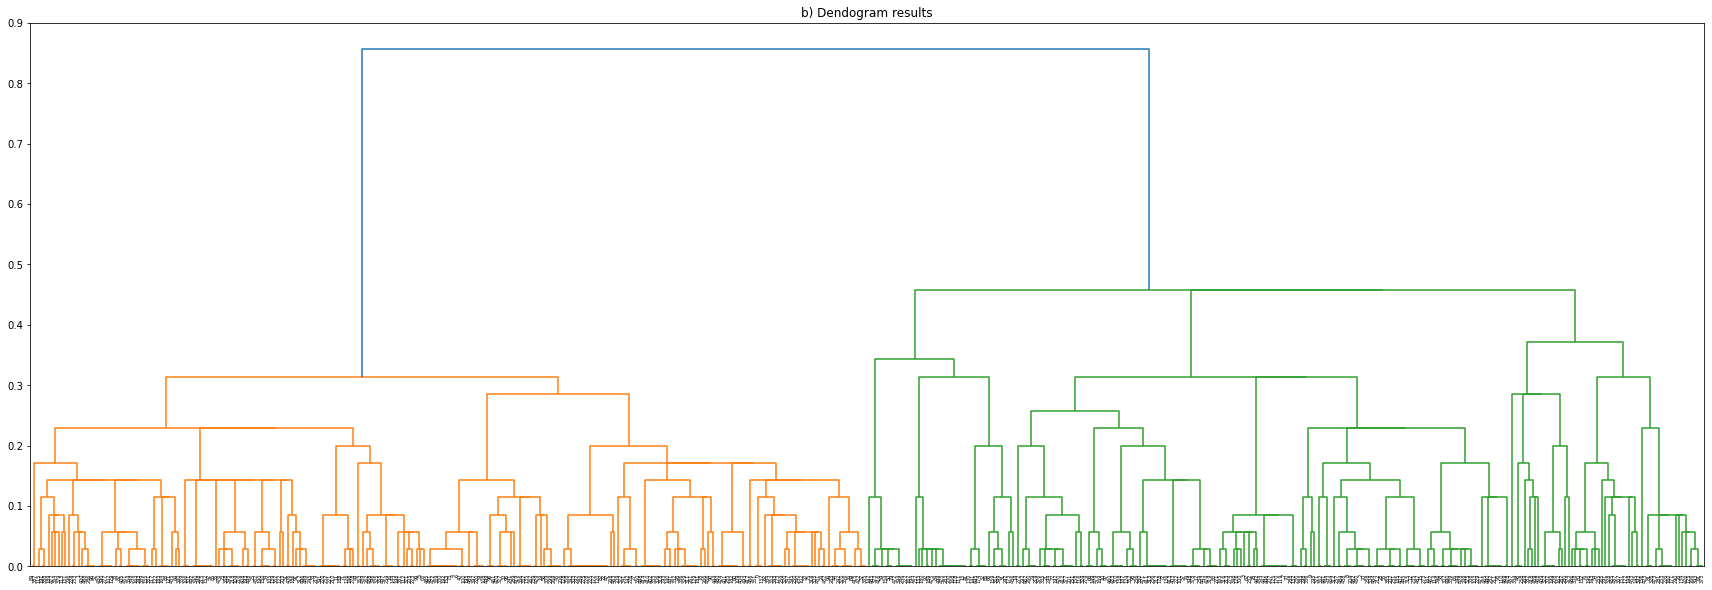

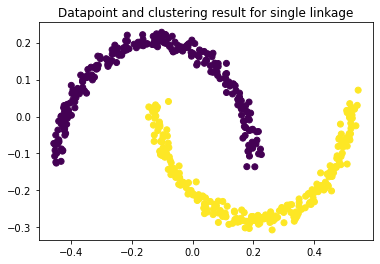

In [14]:
########################### 
# Assignment 8:
#
# Here, you are to Apply your implemented ensemble_clustering function to two datasets,
# SC_data_2.npy and SC_data_3.npy
#
# You will need to first get a list of clustering results by K-means (you also 
# need to choose the n_clusters), you can use the built in K-means function in sklearn.cluster.
#
# Then you will need to compute the co_matrix with your implemented function, and then
# get and display the clustering result with your implementation. Meanwhile, you need 
# to choose a proper distance measurement (the 'linkage' parameter) to make your algorithm
# work.
#
# ===
#np.random.seed(1) # Ensure the results are same on submission
X = np.load('./Data/SC_data_2.npy')

###
# Now apply your ensemble clustering to the first dataset './Data/SC_data_2.npy', display results
#
# Your code here 
###


X = (X - X.mean())/(X.max() - X.min())

y_list = []

lb_km = np.zeros([30,500])
for i in range (5,40):
    init_arr = np.random.normal(0,1,(i,2))
    init_arr = (init_arr - init_arr.mean())/(init_arr.max() - init_arr.min())
    km = KMeans(n_clusters=i,init=init_arr, n_init=1)
    km.fit(X)
    lb = km.labels_
    y_list.append(lb)


co_matrix = compute_co_matrix(y_list)

Z = ensemble_clustering(co_matrix, link_type = 'single')
#print(Z)
fig = plt.figure(figsize=(30, 10))

print('a) The initial partitions taken are 40, and distance measure with best results is single distance, this gives K = 2')
plt.title('b) Dendogram results')
R = dendrogram(Z)
plt.show()

lb = fcluster(Z, t = 2,criterion = 'maxclust')
plt.figure()

plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('Datapoint and clustering result for single linkage')
plt.show()



C:\Users\shefa\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


a) The initial partitions taken are 40, and distance measure with best results is single distance, and K = 2


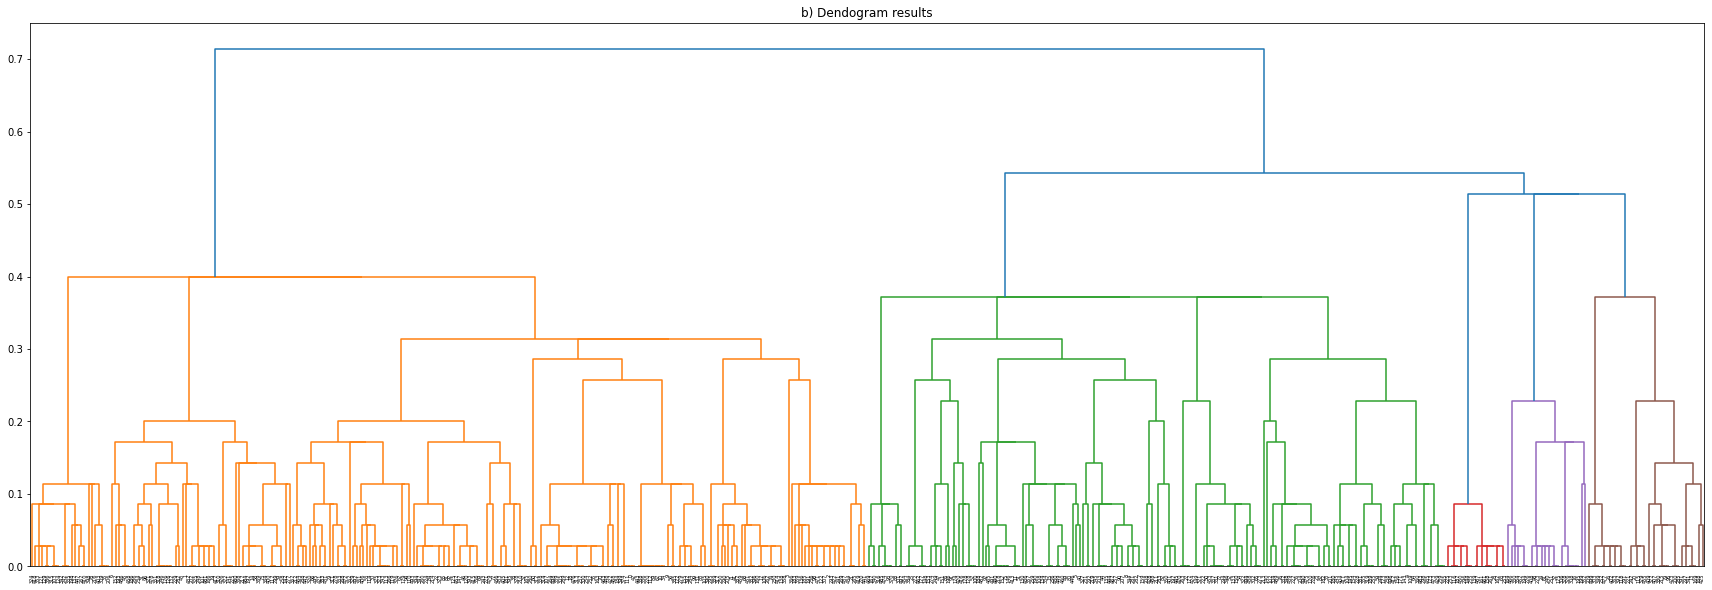

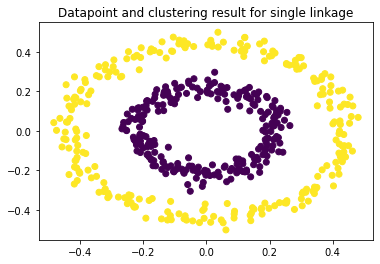

In [15]:
X = np.load('./Data/SC_data_3.npy')

np.random.seed(1)
# Now apply your ensemble clustering to the second dataset, './Data/SC_data_3.npy', display results
#
# Your code here 
###
#print(X.shape)

 
X = (X - X.mean())/(X.max() - X.min())

y_list = []

lb_km = np.zeros([30,500])
for i in range (5,40):
    init_arr = np.random.normal(0,1,(i,2))
    init_arr = (init_arr - init_arr.mean())/(init_arr.max() - init_arr.min())
    km = KMeans(n_clusters=i,init=init_arr, n_init=1)
    km.fit(X)
    lb = km.labels_
    y_list.append(lb)


co_matrix = compute_co_matrix(y_list)


Z = ensemble_clustering(co_matrix, link_type = 'single')
#print(Z)
fig = plt.figure(figsize=(30, 10))
print('a) The initial partitions taken are 40, and distance measure with best results is single distance, and K = 2')
plt.title('b) Dendogram results')
R = dendrogram(Z)
plt.show()

lb = fcluster(Z, t = 2,criterion = 'maxclust')
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('Datapoint and clustering result for single linkage')
plt.show()




### <span style="color:red">=========== End of Assignment 8 ===========</span>